#**EE P 596: Advanced Introduction to Machine Learning**
#**Project 3 Twitter Emotion Prediction**
### Predict the emotion of the given tweet. 
###Team Kaggle Name:  <br>  
###Students: Eric Chang & Naif Ganadily
####Instructor - Prof. Karthik Mohan 
####TA - Ayush Singh
####Grader - Fatwir SM
### Final Due Date March 15th by 11:59pm <br> <br> 

### Part 1
### Due March 12th by 11:59pm
####Submit your solutions for parts 1, 2, 4 and 10 for this. You also need to make submissions to both the Kaggle competitions as a part of this submission. You can make updates on these submissions in the final submission as well.

# Mini-Project Overview
### In this mini-project, you have a dataset of English Twitter messages and would first have to learn and make predictions about the emotion in those tweets. There are 6 emotion labels present - anger, fear, joy, love, sadness, and surprise.
### The data fields in the dataset are:
### 1.  text: a string feature.
###2.  label: a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

### The first Kaggle competition requires you to make predictions on the labels given above. <br> 
###The second Kaggle competition has similar string and a set of possible emotions stored as a list. You can use your previous model trained for the first kaggle competition as a starting point for the second task. Zero-shot setting refers to emotions the model hasn’t seen before and make predictions on it. E.g. “Morose”. You would have to have the model pick from one of the input emotions amongst it.

# Submission Guidelines
### *  You get to work in teams of 2 for the Kaggle and modeling piece!! Please make sure each person of the team gets to work on all aspects of the mini-project and mention at the top of your report the contributions from each person.
### *  The submission is in 2 parts.
### *  **Code:** Please submit a Jupyter/IPython notebook file, report and Kaggle predictions as part of your submission. You can start with the template notebook provided and add in your solutions to it.
### *  **Report:** The report should be in a pdf format and have plots, correlation matrices and tables added in as mentioned in the **Heart Rate Deliverables below**. Feel free to use either latex or word for creating it. Include answers to conceptual questions, and your insights as well. Ideally you should NOT use comments in ipynb to answer any conceptual question.
### *  **Kaggle Contest:** There are a couple of Kaggle competitions, where you submit predictions on ”held out” data sets.

# Dataset Description 
##Files
### *  Local dataset can be found on Canvas.
### *  Kaggle1 Dataset - the test set
### *  sample_submission.csv - a sample submission file in the correct format

##Columns of submission
### *  index - a list from 0 to 2000, corresponding to the index in the kaggle text dataset.
### *  labels - predicted labels for the given index rows.

# Twitter Emotion Deliverables
#### 1.  Basics and Visualization: Load the local dataset. Briefly explain the format in which the dataset is stored. Show the number of data points for each emotion in the test data set. (20 points)
#### 2.  Logistic Regression: Tokenize the given sentences. You can use any library for tokenization. Then use a Logistic Regression model for prediction. (30 points)
#### 3.  LSTM: Use a LSTM model for the given prediction task. (40 points)
#### 4.  Transformer-based: Use a Transformer-based model for the task of fine-tuning on the emotions data set. Briefly explain why you chose the given architecture and how was the model pre-trained (if it was)? You can get started with Hugging Face models for this - An example notebook is already part of the lecture materials (huggingface.co) (40 points)
#### 5.  Insights: What insights did you gain by working on this data set? What are the pros/cons of each ML model? Describe your thought process as well in the choices you made as you set up the machine learning pipeline. Also mention how you took care of over-fitting if any. (15 points)
#### 6.  Tabular Results: Compare the 3 models earlier in a tabular format (table) on the standard metrics for classification - f1-score, precision, recall. (5 points)
#### 7.  Scalability: If you had to scale your model to a million training data points, which of the models would you pick, what bottlenecks would you face and present a rough idea on how you would scale? (10 points)
#### 8.  Plot the curves of training, validation and test sets losses and accuracy scores with number of epochs on the x-axis for the model which gave the best metrics. Show a table in which rows are the algorithms/models used and having Precision, Recall and F1-score as metrics. (15 points)
#### 9.  Interpretability - Print/plot examples of tweets that were misclassified by your best model (False positives and also False negatives). Are the given labels correct? Why do you think the model might have done a mis-classification here? (10 points)
#### 10.  As mentioned in the overview, for the second Kaggle competition, come up with an algorithm to make predictions on it. (HINT: You might want to use word similarity models to find similar emotions to the predicted one.) Clearly describe your approach in the writeup. (40 points)
#### 11.  Kaggle submission (1st - 5 points + 2nd - 10 points)



1.   [✓✓]
2.   [✓✓]
3.   [✓✓] 
4.   [✓✓] 
5.   [-] 
6.   [-]
7.   [-]
8.   [-]
9.   [-]
10.   [-]
11.   [-]

# Loading the Libararies

In [ ]:
# Import the required libraries

In [ ]:
!pip install transformers
!pip install accelerate 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 19.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 6.3 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Added Libraries
import nltk
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exercise 1

In [ ]:
# Loading the dataset
def data_loader(file_path):
  
  df = pd.read_csv(file_path)

  return display(df), display(df.shape)

### Applying the data_loader to all the datasets:

In [ ]:
# Using the data_loader function to show the dataset and shape
# Test Dataset 1
print('Training Dataset:')
data_loader('/content/Kaggle1_Dataset.csv')
print()
print('Training Dataset 1 & Test Dataset 1 Submission Example:')
data_loader('/content/kaggle1_sample_submission.csv')
print()
print('Test Dataset 2:')
# Using the data_loader function to show the dataset and shape
# Test Dataset 2 ?
# Based on this dataset maybe BERT or RoBERTa or EmoReact or EmoBERT?
data_loader('/content/Kaggle2_Dataset.csv')
print()
print('Training Dataset 1 & Test Dataset 2 Submission Example:')
# Using the data_loader function to show the dataset and shape
# Submission and Solutions Example
# Based on this dataset maybe BERT or RoBERTa or EmoReact or EmoBERT?
data_loader('/content/kaggle2_sample_solutions.csv')

Training Dataset:


,index,text
0,0,im feeling quite sad and sorry for myself but ...
1,1,i feel like i am still looking at a blank canv...
2,2,i feel like a faithful servant
3,3,i am just feeling cranky and blue
4,4,i can have for a treat or if i am feeling festive
...,...,...
1995,1995,im having ssa examination tomorrow in the morn...
1996,1996,i constantly worry about their fight against n...
1997,1997,i feel its important to share this info for th...
1998,1998,i truly feel that if you are passionate enough...


(2000, 2)


Training Dataset 1 & Test Dataset 1 Submission Example:


,index,labels
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1995,1995,0
1996,1996,0
1997,1997,0
1998,1998,0


(2000, 2)


Test Dataset 2:


,index,text,possible_emotions
0,0,im feeling rather rotten so im not very ambiti...,"['alarm', 'exasperation', 'terror', 'tendernes..."
1,1,im updating my blog because i feel shitty,"['shock', 'jubilation', 'shock', 'fright', 'fr..."
2,2,i never make her separate from me because i do...,"['panic', 'shock', 'exultation', 'fright', 'jo..."
3,3,i left with my bouquet of red and yellow tulip...,"['attachment', 'annoyance', 'exasperation', 'i..."
4,4,i was feeling a little vain when i did this one,"['tenderness', 'tenderness', 'exultation', 'tr..."
...,...,...,...
1995,1995,i just keep feeling like someone is being unki...,"['jubilation', 'fondness', 'depression', 'stag..."
1996,1996,im feeling a little cranky negative after this...,"['alarm', 'warmth', 'tenderness', 'depression'..."
1997,1997,i feel that i am useful to my people and that ...,"['sorrow', 'fright', 'intimacy', 'stun', 'depr..."
1998,1998,im feeling more comfortable with derby i feel ...,"['depression', 'stun', 'warmth', 'annoyance', ..."


(2000, 3)


Training Dataset 1 & Test Dataset 2 Submission Example:


,index,labels
0,0,regret
1,1,regret
2,2,regret
3,3,regret
4,4,regret
...,...,...
1995,1995,regret
1996,1996,regret
1997,1997,regret
1998,1998,regret


(2000, 2)

(None, None)

As we can see, the dataset has two columns: a text column and a label column. The text column contains a collection of tweets, and the label column contains integers ranging from 0 to 5, where each integer represents an emotion. sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

Index(['text', 'label'], dtype='object')


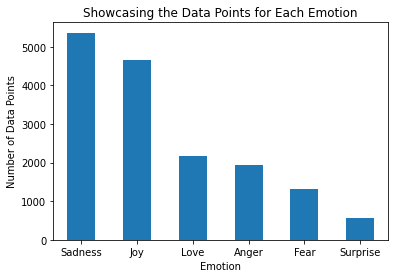

{'Joy': 5362,
 'Sadness': 4666,
 'Anger': 2159,
 'Fear': 1937,
 'Love': 1304,
 'Surprise': 572}

In [ ]:
import pandas as pd

def visualize(df):
    df = pd.read_csv(df)
    print(df.columns)
    emotions = df['label'].value_counts()
    # Counting every data point and saving it as a series

    emotions.plot(kind='bar')
    plt.title('Showcasing the Data Points for Each Emotion')
    plt.xlabel('Emotion')
    plt.ylabel('Number of Data Points')

    # Assigning each data point to its corresponding Label
    dict_labels = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
    plt.xticks(emotions.index, emotions.index.map(dict_labels), rotation=0)
    label_counts = {dict_labels[k]: v for k, v in emotions.items()}
    plt.show()

    return label_counts

df = '/content/Local_Dataset.csv'
visualize(df)


In [ ]:
df = pd.read_csv(df)
df['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

# Exercise 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Intro2AdvancedML/TwitterSentimentProject/TwitterSentiment.csv')
df.dtypes

text     object
label     int64
dtype: object

### Logistic Regression and Vetroization with limited Metrics and no iterational limit without Preprocessing
### Accuracy:  0.8815625

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def tokenize(df):
    # CountVectorizer object to tokenize the tweets
    # from the 'text' column
    # fitting it to the 'text' column
    cv = CountVectorizer()
    df = pd.read_csv('/content/Local_Dataset.csv')
    # Converting the 'text' from object to string
    df['text'] = df['text'].astype(str)
    cv.fit(df['text'])

    tokenized = cv.transform(df['text'])

    # Return a list of tokenized tweets.
    return tokenized


# Tokenize the tweets
tokenized_df = tokenize(df)


def LR(df):
    X = tokenize(df)
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print(classification_report(y_test, y_pred))
    print()
    print('Confusion Matrix: \n')
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
    cm_display.plot() 
    plt.show()

    print()
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    
    # For the Tabular Table
    return y_pred, y_test

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8815625
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       946
           1       0.88      0.93      0.90      1021
           2       0.81      0.74      0.77       296
           3       0.90      0.86      0.88       427
           4       0.84      0.83      0.83       397
           5       0.82      0.67      0.74       113

    accuracy                           0.88      3200
   macro avg       0.86      0.83      0.84      3200
weighted avg       0.88      0.88      0.88      3200


Confusion Matrix: 



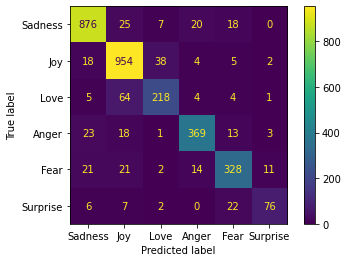


Accuracy:  0.8815625


In [ ]:
y_pred, y_test = LR(df)

### Logistic Regression and Vetroization with limited Metrics and no iterational limit with Preprocessing

### Accuracy:  0.8921875


In [ ]:
!pip uninstall nltk
!pip install nltk
import nltk
nltk.download('omw-1.4')

Found existing installation: nltk 3.7
Uninstalling nltk-3.7:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.9/dist-packages/nltk-3.7.dist-info/*
    /usr/local/lib/python3.9/dist-packages/nltk/*
Proceed (Y/n)? Y
  Successfully uninstalled nltk-3.7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.1 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8921875
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       946
           1       0.89      0.94      0.91      1021
           2       0.84      0.78      0.81       296
           3       0.90      0.87      0.88       427
           4       0.85      0.84      0.85       397
           5       0.84      0.71      0.77       113

    accuracy                           0.89      3200
   macro avg       0.87      0.84      0.86      3200
weighted avg       0.89      0.89      0.89      3200


Confusion Matrix: 



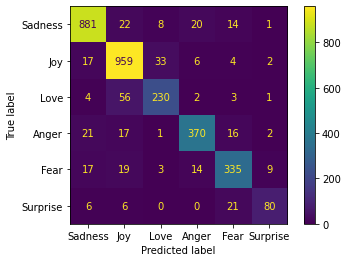


Accuracy:  0.8921875


(array([0, 1, 0, ..., 1, 1, 0]), 8756     0
 4660     1
 6095     0
 304      1
 8241     0
         ..
 15578    1
 5746     1
 6395     1
 7624     1
 15245    0
 Name: label, Length: 3200, dtype: int64)

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')

# Defining stopwords and lemmatizer
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def text_processing(text):


#Convert to lowercase
#Remove punctuation
#Tokenize the text
#Remove stopwords
#Lemmatize the tokens


    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = text.split()

    tokens = [token for token in tokens if token not in stopwords]

    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(tokens)
    return text

df['text'] = df['text'].apply(text_processing)

# Define function to tokenize tweets
def tokenize(df):
    # CountVectorizer object to tokenize the tweets
    # from the 'text' column
    # fitting it to the 'text' column
    cv = CountVectorizer()
    # Converting the 'text' from object to string
    df['text'] = df['text'].astype(str)
    cv.fit(df['text'])

    tokenized = cv.transform(df['text'])

    # Return a list of tokenized tweets.
    return tokenized

# Define function to train logistic regression model
def LR(df):
    X = tokenize(df)
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print(classification_report(y_test, y_pred))
    print()
    print('Confusion Matrix: \n')
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
    cm_display.plot() 
    plt.show()

    print()
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    
    # For the Tabular Table
    return y_pred, y_test

# Train and evaluate the logistic regression model
LR(df)


### Logistic Regression and tokenization with a limit on iterations and Macro Metrics without Preprocessing
### Accuracy: 0.8815625

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve

def tokenize(df):
    # CountVectorizer object to tokenize the tweets
    # from the 'text' column
    # fitting it to the 'text' column
    cv = CountVectorizer()
    # Converting the 'text' from object to string
    df['text'] = df['text'].astype(str)
    cv.fit(df['text'])

    tokenized = cv.transform(df['text'])

    # Return a list of tokenized tweets.
    return tokenized


# Tokenize the tweets
df = pd.read_csv('/content/Local_Dataset.csv')
test_df = pd.read_csv('/content/Kaggle1_Dataset.csv')

tokenized_df = tokenize(df)

# To test the model on a tokenized test dataset
tokenized_kaggle = tokenize(test_df)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
from sklearn.preprocessing import LabelBinarizer

def LR(df, max_iter=2000):
    X = tokenized_df
    y = df['label']
#-------------------------------------------------------------------------#
# Train Test Split using the fitting with Logistic Regression
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
#-------------------------------------------------------------------------#
    y_pred = lr.predict(X_test)
    lb = LabelBinarizer()
    lb.fit(y_test)
    test_labels = lb.transform(y_test)
    test_predictions = lb.transform(y_pred)
#-------------------------------------------------------------------------#
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    auc_macro = roc_auc_score(test_labels, test_predictions, average='macro', multi_class='ovo')
#-------------------------------------------------------------------------#    
    print('Accuracy:', accuracy)
    print(classification_report(y_test, y_pred))
    print()
    print('Confusion Matrix: \n')
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
    cm_display.plot() 
    plt.show()

    print()
    print('Macro Precision:', precision_macro)
    print('Macro Recall:', recall_macro)
    print('Macro F1-score:', f1_macro)
    print('Macro AUC:', auc_macro)
 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8815625
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       946
           1       0.88      0.93      0.90      1021
           2       0.81      0.74      0.77       296
           3       0.90      0.86      0.88       427
           4       0.84      0.83      0.83       397
           5       0.82      0.67      0.74       113

    accuracy                           0.88      3200
   macro avg       0.86      0.83      0.84      3200
weighted avg       0.88      0.88      0.88      3200


Confusion Matrix: 



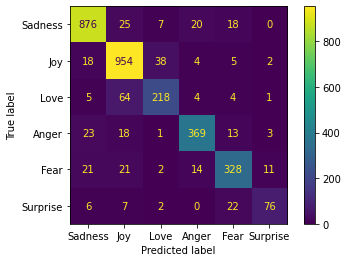


Macro Precision: 0.8614304963046783
Macro Recall: 0.826633373173518
Macro F1-score: 0.8423217917067366
Macro AUC: 0.9004557117676595


In [ ]:
LR(df, max_iter=2000)

### Logistic Regression and tokenization with a limit on iterations and Macro Metrics with Preprocessing
### Accuracy: 0.8915625

In [ ]:
!pip uninstall nltk
!pip install nltk
import nltk
nltk.download('omw-1.4')

Found existing installation: nltk 3.8.1
Uninstalling nltk-3.8.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.9/dist-packages/nltk-3.8.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/nltk/*
Proceed (Y/n)? Y
  Successfully uninstalled nltk-3.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve


import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')

# Defining stopwords and lemmatizer
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def text_processing(text):


#Convert to lowercase
#Remove punctuation
#Tokenize the text
#Remove stopwords
#Lemmatize the tokens


    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = text.split()

    tokens = [token for token in tokens if token not in stopwords]

    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(tokens)
    return text

df = pd.read_csv('/content/Local_Dataset.csv')
df['text'] = df['text'].apply(text_processing)

def tokenize(df):
    # CountVectorizer object to tokenize the tweets
    # from the 'text' column
    # fitting it to the 'text' column
    cv = CountVectorizer()
    # Converting the 'text' from object to string
    df['text'] = df['text'].astype(str)
    cv.fit(df['text'])

    tokenized = cv.transform(df['text'])

    # Return a list of tokenized tweets.
    return tokenized

# Tokenize and Preprocess the tweets
tokenized_df = tokenize(df)

# To test the model on a tokenized test dataset
test_df = pd.read_csv('/content/Kaggle1_Dataset.csv')
test_df['text'] = test_df['text'].apply(text_processing)
tokenized_kaggle = tokenize(test_df)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
from sklearn.preprocessing import LabelBinarizer

def LR(df, max_iter=2000):
    X = tokenized_df
    y = df['label']
#-------------------------------------------------------------------------#
# Train Test Split using the fitting with Logistic Regression
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
#-------------------------------------------------------------------------#
    y_pred = lr.predict(X_test)
    lb = LabelBinarizer()
    lb.fit(y_test)
    test_labels = lb.transform(y_test)
    test_predictions = lb.transform(y_pred)
#-------------------------------------------------------------------------#
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    auc_macro = roc_auc_score(test_labels, test_predictions, average='macro', multi_class='ovo')
#-------------------------------------------------------------------------#    
    print('Accuracy:', accuracy)
    print(classification_report(y_test, y_pred))
    print()
    print('Confusion Matrix: \n')
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
    cm_display.plot() 
    plt.show()

    print()
    print('Macro Precision:', precision_macro)
    print('Macro Recall:', recall_macro)
    print('Macro F1-score:', f1_macro)
    print('Macro AUC:', auc_macro)
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8915625
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       946
           1       0.89      0.94      0.91      1021
           2       0.84      0.77      0.80       296
           3       0.90      0.87      0.88       427
           4       0.85      0.84      0.85       397
           5       0.84      0.71      0.77       113

    accuracy                           0.89      3200
   macro avg       0.87      0.84      0.86      3200
weighted avg       0.89      0.89      0.89      3200


Confusion Matrix: 



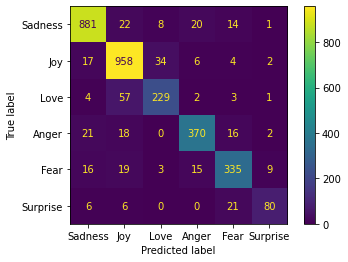


Macro Precision: 0.87424748931107
Macro Recall: 0.8435896555766926
Macro F1-score: 0.8575870009744162
Macro AUC: 0.9100501033399157


In [ ]:
LR(df, max_iter=2000)

### A Article on Macro and Micro Metrics

https://medium.com/@ramit.singh.pahwa/micro-macro-precision-recall-and-f-score-44439de1a044

Distilbert-base-uncased-emotion is a model fine-tuned for detecting emotions in texts, including sadness, joy, love, anger, fear and surprise.

Resource:
https://huggingface.co/blog/sentiment-analysis-python

# Exercise 3


### LSTM Model
#### Kaggle Score 0.8945

https://keras.io/api/layers/recurrent_layers/lstm/

https://keras.io/api/preprocessing/text/#tokenizer-class

In [ ]:
!pip install --upgrade keras tensorflow
!pip install -U scikit-learn
!pip install -U keras
!pip install -U tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [6]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

#------------------------------------------------------------------------------#
# Tokenizer: https://keras.io/api/preprocessing/text/
# Sequential model: https://keras.io/api/models/sequential/
# Embedding layer: https://keras.io/api/layers/core_layers/embedding/
# LSTM layer: https://keras.io/api/layers/recurrent_layers/lstm/
# Dense layer: https://keras.io/api/layers/core_layers/dense/
# compile method: https://keras.io/api/models/model_training_apis/#compile-method
# fit method: https://keras.io/api/models/model_training_apis/#fit-method
# pad_sequences function: https://keras.io/api/preprocessing/timeseries/#pad_sequences-function
#------------------------------------------------------------------------------#
# load the training dataset
train_data = pd.read_csv('/content/Local_Dataset.csv')

#------------------------------------------------------------------------------#
nltk.download('stopwords')
nltk.download('wordnet')
# Defining stopwords and lemmatizer
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def text_processing(text):
#Convert to lowercase
#Remove punctuation
#Tokenize the text
#Remove stopwords
#Lemmatize the tokens
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(tokens)
    return text

train_data['text'] = train_data['text'].apply(text_processing)
#------------------------------------------------------------------------------#
# tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])
train_seq = tokenizer.texts_to_sequences(train_data['text'])
train_pad_seq = pad_sequences(train_seq, maxlen=50, padding='post')
#------------------------------------------------------------------------------#
# create one-hot-encoded labels
train_labels = pd.get_dummies(train_data['label']).values
#------------------------------------------------------------------------------#
X_train, X_test, y_train, y_test = train_test_split(train_pad_seq, train_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#------------------------------------------------------------------------------#
# define the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 32, input_length=50))
model.add(LSTM(64))
model.add(Dense(6, activation='softmax'))
#------------------------------------------------------------------------------#
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#------------------------------------------------------------------------------#
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, batch_size=64)
#------------------------------------------------------------------------------#

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/50
200/200 [==============================] - 8s 28ms/step - loss: 1.5884 - accuracy: 0.3288 - val_loss: 1.5858 - val_accuracy: 0.3300
Epoch 2/50
200/200 [==============================] - 5s 26ms/step - loss: 1.4266 - accuracy: 0.3666 - val_loss: 1.2003 - val_accuracy: 0.4194
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 1.0910 - accuracy: 0.4389 - val_loss: 1.1411 - val_accuracy: 0.4444
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 1.0118 - accuracy: 0.4562 - val_loss: 1.1493 - val_accuracy: 0.4538
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 0.9174 - accuracy: 0.5540 - val_loss: 1.0692 - val_accuracy: 0.5450
Epoch 6/50
200/200 [==============================] - 5s 27ms/step - loss: 0.7474 - accuracy: 0.6919 - val_loss: 0.9060 - val_accuracy: 0.6787
Epoch 7/50
200/200 [==============================] - 5s 27ms/step - loss: 0.5856 - accuracy: 0.7673 - val_loss: 0.7874 - val_accuracy: 0.7331

50/50 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       488
           1       0.89      0.89      0.89       493
           2       0.81      0.71      0.76       156
           3       0.85      0.88      0.86       206
           4       0.80      0.84      0.82       194
           5       0.74      0.73      0.74        63

    accuracy                           0.86      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.86      0.86      0.86      1600


Confusion Matrix: 



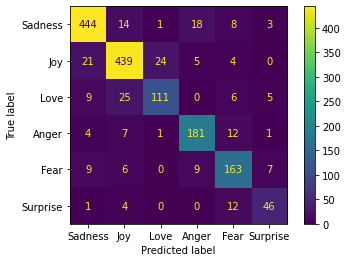

Precision =  0.8322910706418484
Recall =  0.8268077918295273
F1 Score =  0.8288639390718752


In [7]:
# Test Set
pred = model.predict(X_test)
test_pred_labels = np.argmax(pred, axis=1)
y_test = pd.DataFrame(y_test).idxmax(axis=1)

print(classification_report(y_test, test_pred_labels))
print()
print('Confusion Matrix: \n')
cf_matrix = confusion_matrix(y_test, test_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
cm_display.plot() 
plt.show()

print('Precision = ', precision_score(y_test, test_pred_labels, average='macro'))
print('Recall = ', recall_score(y_test, test_pred_labels, average='macro'))
print('F1 Score = ', f1_score(y_test, test_pred_labels, average='macro'))

In [8]:
#------------------------------------------------------------------------------#
# load the test dataset
test_data = pd.read_csv('/content/Kaggle1_Dataset.csv')
#------------------------------------------------------------------------------#
def text_processing(text):
#Convert to lowercase
#Remove punctuation
#Tokenize the text
#Remove stopwords
#Lemmatize the tokens
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(tokens)
    return text

test_data['text'] = test_data['text'].apply(text_processing)
# tokenize and pad the text data
test_seq = tokenizer.texts_to_sequences(test_data['text'])
test_pad_seq = pad_sequences(test_seq, maxlen=50, padding='post')
#------------------------------------------------------------------------------#
# make predictions on test data
test_pred = model.predict(test_pad_seq)
#------------------------------------------------------------------------------#
# save the predictions to a csv file
test_pred_labels = np.argmax(test_pred, axis=1)
test_data['label'] = test_pred_labels
test_data.to_csv('test_pred.csv', index=False)

63/63 [==============================] - 1s 7ms/step


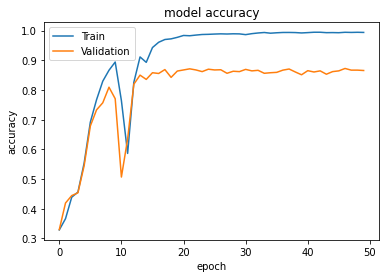

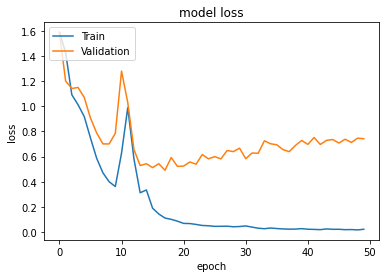

In [9]:
def plotting_nn():
  metric = "accuracy"
  plt.figure()
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()
  return plt.show()

plotting_nn()

# Exercise 4

### Transformer Distilbert base uncased emotion for Kaggle 1
#### Self contained

In [10]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 83.2 MB/s eta 0:00:00


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import pipeline
import pandas as pd
# https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
classifier = pipeline("text-classification", 
                      model='bhadresh-savani/distilbert-base-uncased-emotion', 
                      tokenizer='distilbert-base-uncased')
# -----------------------------------------------------------------#
def transformer(df):

    # Applying it to the Text Column
    emotions = df['text'].apply(classifier)
# -----------------------------------------------------------------#
    # Extract the predicted emotion labels and scores
    predicted_emotions = emotions.apply(lambda x: x[0]['label'])
    predicted_scores = emotions.apply(lambda x: x[0]['score'])
# -----------------------------------------------------------------#
    # Combine the predicted emotion labels and scores into a dataframe
    df_predicted = pd.DataFrame({'text': df['text'],
                                 'predicted_emotion': predicted_emotions,
                                 'predicted_score': predicted_scores})
    return df_predicted
# -----------------------------------------------------------------#
# The Datasets
labelinfo = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}
train_df = pd.read_csv('/content/Local_Dataset.csv')
for i, num in enumerate(train_df['label']):
  for j in labelinfo:
    if labelinfo[j] == num:
      train_df['label'].loc[i] = j
test_df = pd.read_csv('/content/Kaggle1_Dataset.csv')
# -----------------------------------------------------------------#
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#------------------------------------------------------------------#

<ipython-input-12-b4772fdde471>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['label'].loc[i] = j


In [13]:
# Transform the datasets
# -----------------------------------------------------------------#
temp =  X_train.apply(classifier)
train_pred = temp.apply(lambda x: x[0]['label'])

temp = X_val.apply(classifier)
val_pred = temp.apply(lambda x: x[0]['label'])

temp = X_test.apply(classifier)
test_pred = temp.apply(lambda x: x[0]['label'])

train_df_transformed = transformer(train_df)
kaggle_df_transformed = transformer(test_df)
# -----------------------------------------------------------------#
# Metrics
def MetricReport(truth, pred):
  print("Training Classification Report: ")

  print(classification_report(truth,
                              pred,
                              zero_division=1))

  print("\nTraining Confusion Matrix: ")
  cf_matrix = confusion_matrix(truth, pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
  cm_display.plot() 
  plt.show()

  print('Accuracy = ', accuracy_score(truth, pred))
  print('Precision = ', precision_score(truth, pred, average='macro'))
  print('Recall = ', recall_score(truth, pred, average='macro'))
  print('F1 Score = ', f1_score(truth, pred, average='macro'))

Training
Training Classification Report: 
              precision    recall  f1-score   support

       anger       0.99      0.99      0.99      1732
        fear       0.97      0.99      0.98      1540
         joy       1.00      0.99      0.99      4341
        love       0.95      0.99      0.97      1008
     sadness       1.00      1.00      1.00      3720
    surprise       0.96      0.92      0.94       459

    accuracy                           0.99     12800
   macro avg       0.98      0.98      0.98     12800
weighted avg       0.99      0.99      0.99     12800


Training Confusion Matrix: 


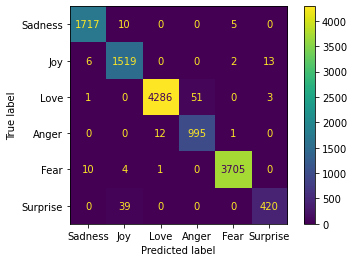

Accuracy =  0.98765625
Precision =  0.9776413494659715
Recall =  0.9771894721379502
F1 Score =  0.9772354377949437

Validation
Training Classification Report: 
              precision    recall  f1-score   support

       anger       0.99      1.00      0.99       221
        fear       0.98      1.00      0.99       203
         joy       1.00      0.99      1.00       528
        love       0.98      0.99      0.99       140
     sadness       1.00      1.00      1.00       458
    surprise       1.00      0.92      0.96        50

    accuracy                           0.99      1600
   macro avg       0.99      0.98      0.99      1600
weighted avg       0.99      0.99      0.99      1600


Training Confusion Matrix: 


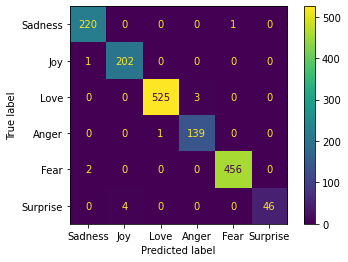

Accuracy =  0.9925
Precision =  0.9903189207364013
Recall =  0.9822262528660063
F1 Score =  0.9859735388912743

Test
Training Classification Report: 
              precision    recall  f1-score   support

       anger       1.00      0.99      0.99       206
        fear       0.96      0.99      0.98       194
         joy       1.00      0.98      0.99       493
        love       0.95      1.00      0.97       156
     sadness       1.00      1.00      1.00       488
    surprise       0.98      0.94      0.96        63

    accuracy                           0.99      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.99      0.99      0.99      1600


Training Confusion Matrix: 


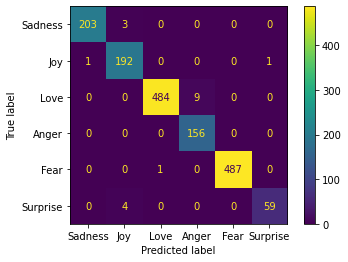

Accuracy =  0.988125
Precision =  0.9811080304894128
Recall =  0.9818884654900216
F1 Score =  0.9812341265829524


In [14]:
print('Training')
MetricReport(y_train, train_pred)
print()
print('Validation')
MetricReport(y_val, val_pred)
print()
print('Test')
MetricReport(y_test, test_pred)

Training Classification Report: 
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      2161
        fear       1.00      1.00      1.00      1977
         joy       1.00      1.00      1.00      5310
        love       1.00      1.00      1.00      1353
     sadness       1.00      1.00      1.00      4657
    surprise       1.00      1.00      1.00       542

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000


Training Confusion Matrix: 


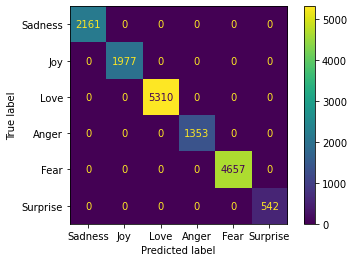


Training Accuracy:  1.0

Training Macro Precision: 1.0
Training Macro Recall: 1.0
Training Macro F1-score: 1.0


NameError: ignored

In [15]:
# Train the model on the training dataset
train_predictions = train_df_transformed['text'].apply(lambda text: classifier(text)[0]['label'])

train_report = classification_report(train_df_transformed['predicted_emotion'],
                                     train_predictions,
                                     output_dict=True,
                                     zero_division=1)

train_matrix = confusion_matrix(train_df_transformed['predicted_emotion'],
                                train_predictions)
# -----------------------------------------------------------------#
# Metrics
print("Training Classification Report: ")

print(classification_report(train_df_transformed['predicted_emotion'],
                            train_predictions,
                            zero_division=1))

print("\nTraining Confusion Matrix: ")
cm_display = ConfusionMatrixDisplay(confusion_matrix=train_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
cm_display.plot() 
plt.show()

accuracy = accuracy_score(train_df_transformed['predicted_emotion'],
                          train_predictions)

macro_precision = train_report['macro avg']['precision']
macro_recall = train_report['macro avg']['recall']
macro_f1 = train_report['macro avg']['f1-score']
print("\nTraining Accuracy: ", accuracy)
print("\nTraining Macro Precision:", macro_precision)
print("Training Macro Recall:", macro_recall)
print("Training Macro F1-score:", macro_f1)
# -----------------------------------------------------------------#
# Predicting on the test dataset and save the predictions
# Re wrote the classifier due to defining it outside the function

classifier = pipeline("text-classification", 
                      model='bhadresh-savani/distilbert-base-uncased-emotion', 
                      tokenizer='distilbert-base-uncased')

test_predictions = test_df_transformed['text'].apply(lambda text: classifier(text)[0]['label'])
test_df['label'] = test_predictions

In [ ]:
test_df

,index,text,label
0,0,im feeling quite sad and sorry for myself but ...,sadness
1,1,i feel like i am still looking at a blank canv...,sadness
2,2,i feel like a faithful servant,joy
3,3,i am just feeling cranky and blue,anger
4,4,i can have for a treat or if i am feeling festive,joy
...,...,...,...
1995,1995,im having ssa examination tomorrow in the morn...,sadness
1996,1996,i constantly worry about their fight against n...,joy
1997,1997,i feel its important to share this info for th...,joy
1998,1998,i truly feel that if you are passionate enough...,joy


In [ ]:
map = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

test_df['label'] = test_df['label'].map(map)

In [ ]:
test_df

,index,text,label
0,0,im feeling quite sad and sorry for myself but ...,0
1,1,i feel like i am still looking at a blank canv...,0
2,2,i feel like a faithful servant,1
3,3,i am just feeling cranky and blue,3
4,4,i can have for a treat or if i am feeling festive,1
...,...,...,...
1995,1995,im having ssa examination tomorrow in the morn...,0
1996,1996,i constantly worry about their fight against n...,1
1997,1997,i feel its important to share this info for th...,1
1998,1998,i truly feel that if you are passionate enough...,1


In [ ]:
# Remove the text column then submit it

In [ ]:
a = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test), pd.DataFrame(test_pred)], axis = 1, ignore_index=True)
a.columns = ['text', 'truth', 'predictions']
df_new = a[a['truth'] != a['predictions']]

for i in range(4):
  print(df_new['text'].iloc[i+7])
  print('Truth:', df_new['truth'].iloc[i+7])
  print('Prediction:', df_new['predictions'].iloc[i+7])
  print()

### Transformer for Zero Shot for Kaggle 2

### Required Preprocessing and Libraries


In [ ]:
df = pd.read_csv('/content/Local_Dataset.csv')
df_test = pd.read_csv('/content/Kaggle2_Dataset.csv')

display(df)
print()
display(df_test)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


,index,text,possible_emotions
0,0,im feeling rather rotten so im not very ambiti...,"['alarm', 'exasperation', 'terror', 'tendernes..."
1,1,im updating my blog because i feel shitty,"['shock', 'jubilation', 'shock', 'fright', 'fr..."
2,2,i never make her separate from me because i do...,"['panic', 'shock', 'exultation', 'fright', 'jo..."
3,3,i left with my bouquet of red and yellow tulip...,"['attachment', 'annoyance', 'exasperation', 'i..."
4,4,i was feeling a little vain when i did this one,"['tenderness', 'tenderness', 'exultation', 'tr..."
...,...,...,...
1995,1995,i just keep feeling like someone is being unki...,"['jubilation', 'fondness', 'depression', 'stag..."
1996,1996,im feeling a little cranky negative after this...,"['alarm', 'warmth', 'tenderness', 'depression'..."
1997,1997,i feel that i am useful to my people and that ...,"['sorrow', 'fright', 'intimacy', 'stun', 'depr..."
1998,1998,im feeling more comfortable with derby i feel ...,"['depression', 'stun', 'warmth', 'annoyance', ..."


In [ ]:
!pip uninstall nltk
!pip install nltk
import nltk
nltk.download('omw-1.4')

Found existing installation: nltk 3.7
Uninstalling nltk-3.7:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.9/dist-packages/nltk-3.7.dist-info/*
    /usr/local/lib/python3.9/dist-packages/nltk/*
Proceed (Y/n)? Y
  Successfully uninstalled nltk-3.7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.9 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')

# Defining stopwords and lemmatizer
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def text_processing(text):


#Convert to lowercase
#Remove punctuation
#Tokenize the text
#Remove stopwords
#Lemmatize the tokens


    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = text.split()

    tokens = [token for token in tokens if token not in stopwords]

    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(tokens)
    return text

df['text'] = df['text'].apply(text_processing)
df_test['text'] = df_test['text'].apply(text_processing)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Print the preprocessed dataframes
display(df)
print()
display(df_test)

,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turning feel pathetic still waiting table subb...,0
15997,feel strong good overall,1
15998,feel like rude comment im glad,3


,index,text,possible_emotions
0,0,im feeling rather rotten im ambitious right,"['alarm', 'exasperation', 'terror', 'tendernes..."
1,1,im updating blog feel shitty,"['shock', 'jubilation', 'shock', 'fright', 'fr..."
2,2,never make separate ever want feel like ashamed,"['panic', 'shock', 'exultation', 'fright', 'jo..."
3,3,left bouquet red yellow tulip arm feeling slig...,"['attachment', 'annoyance', 'exasperation', 'i..."
4,4,feeling little vain one,"['tenderness', 'tenderness', 'exultation', 'tr..."
...,...,...,...
1995,1995,keep feeling like someone unkind wrong think g...,"['jubilation', 'fondness', 'depression', 'stag..."
1996,1996,im feeling little cranky negative doctor appoi...,"['alarm', 'warmth', 'tenderness', 'depression'..."
1997,1997,feel useful people give great feeling achievement,"['sorrow', 'fright', 'intimacy', 'stun', 'depr..."
1998,1998,im feeling comfortable derby feel though start...,"['depression', 'stun', 'warmth', 'annoyance', ..."


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Failed Attempt:
Trying to use every emotion against every text 
Failed due to computational limitations

In [ ]:
import ast
# Documentation: https://docs.python.org/3/library/ast.html
# Extracting all the emotions
# Removing duplicates and sort the emotions in alphabetical order

all_emotions = [emotion for emotions in df_test['possible_emotions'] for emotion in ast.literal_eval(emotions)]
unique_emotions = sorted(list(set(all_emotions)))



In [ ]:
unique_emotions

['alarm',
 'annoyance',
 'astound',
 'attachment',
 'crossness',
 'dejection',
 'delight',
 'depression',
 'exasperation',
 'exultation',
 'flabbergast',
 'fondness',
 'fright',
 'horror',
 'intimacy',
 'irritation',
 'joyfulness',
 'jubilation',
 'panic',
 'regret',
 'shock',
 'sorrow',
 'stagger',
 'stun',
 'tenderness',
 'terror',
 'triumph',
 'unhappiness',
 'vexation',
 'warmth']

In [ ]:
from transformers import pipeline
import pandas as pd

# Load the zero-shot classification pipeline
# Define the emotions to classify the text into

classifier = pipeline("zero-shot-classification")
possible_emotions = ['alarm',
 'annoyance',
 'astound',
 'attachment',
 'crossness',
 'dejection',
 'delight',
 'depression',
 'exasperation',
 'exultation',
 'flabbergast',
 'fondness',
 'fright',
 'horror',
 'intimacy',
 'irritation',
 'joyfulness',
 'jubilation',
 'panic',
 'regret',
 'shock',
 'sorrow',
 'stagger',
 'stun',
 'tenderness',
 'terror',
 'triumph',
 'unhappiness',
 'vexation',
 'warmth']

# Use the classifier to predict the most likely emotion for each row
predicted_emotions = []
for i, row in df_test_cut.iterrows():
    text = row["text"]
    possible_emotions = ast.literal_eval(row["possible_emotions"])
    max_score = -1
    predicted_emotion = ""
    for emotion in possible_emotions:
        result = classifier(text, emotion)
        if result["scores"][0] > max_score:
            max_score = result["scores"][0]
            predicted_emotion = result["labels"][0]
    predicted_emotions.append(predicted_emotion)

# Add the predicted emotions to the test dataframe
df_test["predicted_emotion"] = predicted_emotions

# Save the results to a CSV file
df_test.to_csv('/path/to/predictions2.csv', index=False)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


KeyboardInterrupt: ignored

### Failed Attempt 2:
Tried a for loop to itterate through the possible_emotion row by row and picking the emotion with the highest probability score 
Failed due to a 0% on Kaggle wrong predictions

In [ ]:
from transformers import pipeline
import pandas as pd
import ast

# Loading the zero-shot classification pipeline
# Using the classifier to predict the most likely emotion for each row and possible emotion
# Model: twitter-roberta-base-emotion
classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion")


predicted_emotions = []
for i, row in df_test.iterrows():
    text = row["text"]
    possible_emotions = ast.literal_eval(row["possible_emotions"])
    max_score = -1
    predicted_emotion = ""
    for emotion in possible_emotions:
        result = classifier(text, [emotion])
        if result[0]["score"] > max_score:
            max_score = result[0]["score"]
            predicted_emotion = emotion
    predicted_emotions.append(predicted_emotion)

# Add the predicted emotions to the test dataframe
df_test["predicted_emotions"] = predicted_emotions

# Save the results to a CSV file
df_test.to_csv('predictions3.csv', index=False)


Streaming output truncated to the last 5000 lines.
Ignoring args : (['attachment'],)
Ignoring args : (['terror'],)
Ignoring args : (['unhappiness'],)
Ignoring args : (['fright'],)
Ignoring args : (['fondness'],)
Ignoring args : (['irritation'],)
Ignoring args : (['warmth'],)
Ignoring args : (['panic'],)
Ignoring args : (['flabbergast'],)
Ignoring args : (['astound'],)
Ignoring args : (['jubilation'],)
Ignoring args : (['exasperation'],)
Ignoring args : (['dejection'],)
Ignoring args : (['intimacy'],)
Ignoring args : (['tenderness'],)
Ignoring args : (['sorrow'],)
Ignoring args : (['fondness'],)
Ignoring args : (['terror'],)
Ignoring args : (['depression'],)
Ignoring args : (['crossness'],)
Ignoring args : (['alarm'],)
Ignoring args : (['fondness'],)
Ignoring args : (['jubilation'],)
Ignoring args : (['exultation'],)
Ignoring args : (['regret'],)
Ignoring args : (['intimacy'],)
Ignoring args : (['attachment'],)
Ignoring args : (['depression'],)
Ignoring args : (['delight'],)
Ignoring ar

In [ ]:
df_pred2 = pd.read_csv('/content/predictions3.csv')
df_pred2.drop("possible_emotions", axis =1, inplace = True)
df_pred2.drop("text", axis=1, inplace = True)
df_pred2 = df_pred2.rename(columns={'predicted_emotions': 'labels'})
df_pred2.to_csv('predictions6.csv', index=False)

In [ ]:
display(df_pred2)

,index,labels
0,0,alarm
1,1,shock
2,2,panic
3,3,attachment
4,4,tenderness
...,...,...
1995,1995,jubilation
1996,1996,alarm
1997,1997,sorrow
1998,1998,depression


### Successful Attempt 3:
Used roberta-large-mnli a much larger pretrained model and looped through the possible_emotion row by row and picking the emotion with the highest probability score 
Succeeded with 0.364% score on Kaggle

In [ ]:
from transformers import pipeline
import pandas as pd
import ast

# Loading the zero-shot classification pipeline using the mode
# roberta-large-mnli
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")

predicted_emotions = []
for i, row in df_test.iterrows():
    text = row["text"]
    possible_emotions = ast.literal_eval(row["possible_emotions"])
    max_score = -1
    predicted_emotion = ""
    for emotion in possible_emotions:
        result = classifier(text, emotion)
        if result["scores"][0] > max_score:
            max_score = result["scores"][0]
            predicted_emotion = result["labels"][0]
    predicted_emotions.append(predicted_emotion)

# Add the predicted emotions to the test dataframe
df_test["predicted_emotions"] = predicted_emotions

# Save the results to a CSV file
df_test.to_csv('predictions7.csv', index=False)

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
df_pred5 = pd.read_csv('predictions7.csv')
df_pred5.drop("possible_emotions", axis =1, inplace = True)
df_pred5.drop("text", axis=1, inplace = True)
df_pred5 = df_pred5.rename(columns={'predicted_emotions': 'labels'})
df_pred5.to_csv('predictions7.csv', index=False)
df_pred5

,index,labels
0,0,exasperation
1,1,sorrow
2,2,regret
3,3,intimacy
4,4,unhappiness
...,...,...
1995,1995,annoyance
1996,1996,vexation
1997,1997,triumph
1998,1998,warmth


### Unsure Attempt 4:
Used t5 large a much larger pretrained model and looped through the possible_emotion row by row and picking the emotion with the highest probability score.
Unable to verify until I restart the kernel

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model = T5ForConditionalGeneration.from_pretrained("t5-large")
tokenizer = T5Tokenizer.from_pretrained("t5-large")

predicted_emotions = []

for i, row in df_test.iterrows():
    text = row["text"]
    possible_emotions = ast.literal_eval(row["possible_emotions"])
    input_text = "classify emotions: {} to {}".format(text, possible_emotions)
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    output = model.generate(input_ids)
    predicted_emotion = tokenizer.decode(output[0], skip_special_tokens=True)
    predicted_emotions.append(predicted_emotion)

# Add the predicted emotions to the test dataframe
df_test["predicted_emotions"] = predicted_emotions

# Save the results to a CSV file
df_test.to_csv('predictions8.csv', index=False)


TypeError: ignored

In [ ]:
df_pred8 = pd.read_csv('predictions8.csv')
df_pred8

### Unsure Attempt 5:
Used GPT-2 a much larger pretrained model and looped through the possible_emotion row by row and picking the emotion with the highest probability score.
Computationally Expensive and the run time is extermely long almost 2 hours
Kaggle Score: 0.0755%

In [ ]:
from transformers import pipeline

# load the zero-shot classification pipeline with GPT-2 as the model
classifier = pipeline("zero-shot-classification", model="EleutherAI/gpt-neo-2.7B")
predicted_emotions = []
for i, row in df_test.iterrows():
    text = row["text"]
    possible_emotions = ast.literal_eval(row["possible_emotions"])
    max_score = -1
    predicted_emotion = ""
    for emotion in possible_emotions:
        result = classifier(text, emotion)
        if result["scores"][0] > max_score:
            max_score = result["scores"][0]
            predicted_emotion = result["labels"][0]
    predicted_emotions.append(predicted_emotion)

# Add the predicted emotions to the test dataframe
df_test["predicted_emotions"] = predicted_emotions

# Save the results to a CSV file
df_test.to_csv('predictions9.csv', index=False)

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-2.7B and are newly initialized: ['transformer.h.25.attn.attention.bias', 'transformer.h.21.attn.attention.bias', 'transformer.h.19.attn.attention.bias', 'transformer.h.15.attn.attention.bias', 'transformer.h.9.attn.attention.bias', 'transformer.h.13.attn.attention.bias', 'transformer.h.27.attn.attention.bias', 'transformer.h.3.attn.attention.bias', 'transformer.h.17.attn.attention.bias', 'transformer.h.7.attn.attention.bias', 'transformer.h.1.attn.attention.bias', 'transformer.h.29.attn.attention.bias', 'transformer.h.31.attn.attention.bias', 'transformer.h.5.attn.attention.bias', 'transformer.h.23.attn.attention.bias', 'transformer.h.11.attn.attention.bias', 'score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Using pad_token, but it is not set yet.
Tokenizer was not supporting padding necessary for zero-shot, attempting to use  `pad_token=eos_token`


In [ ]:
df_pred9 = pd.read_csv('predictions9.csv')
df_pred9

,index,text,possible_emotions,predicted_emotions
0,0,im feeling rather rotten so im not very ambiti...,"['alarm', 'exasperation', 'terror', 'tendernes...",exasperation
1,1,im updating my blog because i feel shitty,"['shock', 'jubilation', 'shock', 'fright', 'fr...",tenderness
2,2,i never make her separate from me because i do...,"['panic', 'shock', 'exultation', 'fright', 'jo...",regret
3,3,i left with my bouquet of red and yellow tulip...,"['attachment', 'annoyance', 'exasperation', 'i...",intimacy
4,4,i was feeling a little vain when i did this one,"['tenderness', 'tenderness', 'exultation', 'tr...",intimacy
...,...,...,...,...
1995,1995,i just keep feeling like someone is being unki...,"['jubilation', 'fondness', 'depression', 'stag...",warmth
1996,1996,im feeling a little cranky negative after this...,"['alarm', 'warmth', 'tenderness', 'depression'...",warmth
1997,1997,i feel that i am useful to my people and that ...,"['sorrow', 'fright', 'intimacy', 'stun', 'depr...",intimacy
1998,1998,im feeling more comfortable with derby i feel ...,"['depression', 'stun', 'warmth', 'annoyance', ...",horror


In [ ]:

df_pred9.drop("possible_emotions", axis =1, inplace = True)
df_pred9.drop("text", axis=1, inplace = True)
df_pred9 = df_pred9.rename(columns={'predicted_emotions': 'labels'})
df_pred9.to_csv('predictions9.csv', index=False)
df_pred9

,index,labels
0,0,exasperation
1,1,tenderness
2,2,regret
3,3,intimacy
4,4,intimacy
...,...,...
1995,1995,warmth
1996,1996,warmth
1997,1997,intimacy
1998,1998,horror


# Exercise 5 (Dealing with Overfit)

In [ ]:
def undersampsRand(data):
  df0 = data[data['label'] == 0]
  df1 = data[data['label'] == 1]
  df2 = data[data['label'] == 2]
  df3 = data[data['label'] == 3]
  df4 = data[data['label'] == 4]
  df5 = data[data['label'] == 5]

  df0 = df0.sample(n = 500, replace = True)
  df1 = df1.sample(n = 500, replace = True)
  df2 = df2.sample(n = 500, replace = True)
  df3 = df3.sample(n = 500, replace = True)
  df4 = df4.sample(n = 500, replace = True)
  df5 = df5.sample(n = 500, replace = True)

  return pd.concat([df0, df1, df2, df3, df4, df5], axis = 0)

Logistic Regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7516666666666667
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       118
           1       0.57      0.61      0.59        99
           2       0.80      0.82      0.81        96
           3       0.82      0.78      0.80       101
           4       0.71      0.80      0.75        91
           5       0.90      0.93      0.91        95

    accuracy                           0.75       600
   macro avg       0.75      0.76      0.75       600
weighted avg       0.75      0.75      0.75       600


Confusion Matrix: 



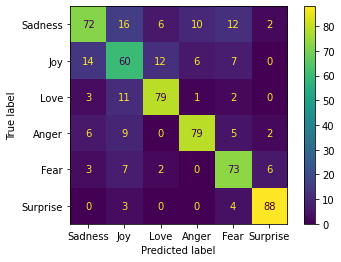


Macro Precision: 0.7547208542996134
Macro Recall: 0.7583064289576608
Macro F1-score: 0.7548023009112717
Macro AUC: 0.8542990454455425


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve

def tokenize(df):
    # CountVectorizer object to tokenize the tweets
    # from the 'text' column
    # fitting it to the 'text' column
    cv = CountVectorizer()
    # Converting the 'text' from object to string
    df['text'] = df['text'].astype(str)
    cv.fit(df['text'])

    tokenized = cv.transform(df['text'])

    # Return a list of tokenized tweets.
    return tokenized


# Tokenize the tweets
df = pd.read_csv('/content/drive/MyDrive/Intro2AdvancedML/TwitterSentimentProject/TwitterSentiment.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Intro2AdvancedML/TwitterSentimentProject/Kaggle1Sentiment.csv')
#---------------------------------------------------------------------------#
#Undersample
df = undersampsRand(df)
#_---------------------------------------------------------------------------#
tokenized_df = tokenize(df)

# To test the model on a tokenized test dataset
tokenized_kaggle = tokenize(test_df)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
from sklearn.preprocessing import LabelBinarizer

def LR(df, max_iter=2000):
    X = tokenized_df
    y = df['label']
#-------------------------------------------------------------------------#
# Train Test Split using the fitting with Logistic Regression
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
#-------------------------------------------------------------------------#
    y_pred = lr.predict(X_test)
    lb = LabelBinarizer()
    lb.fit(y_test)
    test_labels = lb.transform(y_test)
    test_predictions = lb.transform(y_pred)
#-------------------------------------------------------------------------#
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    auc_macro = roc_auc_score(test_labels, test_predictions, average='macro', multi_class='ovo')
#-------------------------------------------------------------------------#    
    print('Accuracy:', accuracy)
    print(classification_report(y_test, y_pred))
    print()
    print('Confusion Matrix: \n')
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
    cm_display.plot() 
    plt.show()

    print()
    print('Macro Precision:', precision_macro)
    print('Macro Recall:', recall_macro)
    print('Macro F1-score:', f1_macro)
    print('Macro AUC:', auc_macro)
    
LR(df, max_iter=2000)

LSTM

Epoch 1/30
38/38 [==============================] - 4s 41ms/step - loss: 1.7935 - accuracy: 0.1596 - val_loss: 1.7974 - val_accuracy: 0.1500
Epoch 2/30
38/38 [==============================] - 1s 26ms/step - loss: 1.7923 - accuracy: 0.1683 - val_loss: 1.7929 - val_accuracy: 0.1667
Epoch 3/30
38/38 [==============================] - 1s 27ms/step - loss: 1.7918 - accuracy: 0.1708 - val_loss: 1.7946 - val_accuracy: 0.1533
Epoch 4/30
38/38 [==============================] - 1s 27ms/step - loss: 1.7855 - accuracy: 0.1908 - val_loss: 1.7735 - val_accuracy: 0.2300
Epoch 5/30
38/38 [==============================] - 1s 28ms/step - loss: 1.5822 - accuracy: 0.2983 - val_loss: 1.5092 - val_accuracy: 0.2600
Epoch 6/30
38/38 [==============================] - 1s 27ms/step - loss: 1.2770 - accuracy: 0.3762 - val_loss: 1.4760 - val_accuracy: 0.3767
Epoch 7/30
38/38 [==============================] - 1s 27ms/step - loss: 1.1104 - accuracy: 0.4629 - val_loss: 1.4829 - val_accuracy: 0.3800
Epoch 8/30
38

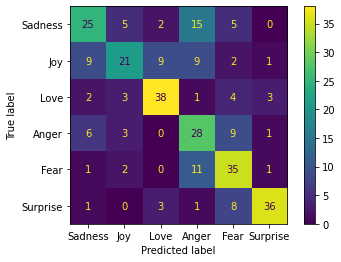

Precision =  0.626677625207037
Recall =  0.6113450890448924
F1 Score =  0.6105821459699207


In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

#------------------------------------------------------------------------------#
# Tokenizer: https://keras.io/api/preprocessing/text/
# Sequential model: https://keras.io/api/models/sequential/
# Embedding layer: https://keras.io/api/layers/core_layers/embedding/
# LSTM layer: https://keras.io/api/layers/recurrent_layers/lstm/
# Dense layer: https://keras.io/api/layers/core_layers/dense/
# compile method: https://keras.io/api/models/model_training_apis/#compile-method
# fit method: https://keras.io/api/models/model_training_apis/#fit-method
# pad_sequences function: https://keras.io/api/preprocessing/timeseries/#pad_sequences-function
#------------------------------------------------------------------------------#
# load the training dataset
train_data = pd.read_csv('/content/drive/MyDrive/Intro2AdvancedML/TwitterSentimentProject/TwitterSentiment.csv')
#---------------------------------------------------------------------------#
#Undersample
train_data = undersampsRand(train_data)
#------------------------------------------------------------------------------#
# tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])
train_seq = tokenizer.texts_to_sequences(train_data['text'])
train_pad_seq = pad_sequences(train_seq, maxlen=50, padding='post')
#------------------------------------------------------------------------------#
# create one-hot-encoded labels
train_labels = pd.get_dummies(train_data['label']).values
#------------------------------------------------------------------------------#
X_train, X_test, y_train, y_test = train_test_split(train_pad_seq, train_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#------------------------------------------------------------------------------#
# define the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 32, input_length=50))
model.add(LSTM(64))
model.add(Dense(6, activation='softmax'))
#------------------------------------------------------------------------------#
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#------------------------------------------------------------------------------#
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30, batch_size=64)
#------------------------------------------------------------------------------#
# Test Set
pred = model.predict(X_test)
test_pred_labels = np.argmax(pred, axis=1)
y_test = pd.DataFrame(y_test).idxmax(axis=1)

print(classification_report(y_test, test_pred_labels))
print()
print('Confusion Matrix: \n')
cf_matrix = confusion_matrix(y_test, test_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
cm_display.plot() 
plt.show()

print('Precision = ', precision_score(y_test, test_pred_labels, average='macro'))
print('Recall = ', recall_score(y_test, test_pred_labels, average='macro'))
print('F1 Score = ', f1_score(y_test, test_pred_labels, average='macro'))

In [ ]:
#------------------------------------------------------------------------------#
# load the test dataset
test_data = pd.read_csv('/content/drive/MyDrive/Intro2AdvancedML/TwitterSentimentProject/Kaggle1Sentiment.csv')
#------------------------------------------------------------------------------#
# tokenize and pad the text data
test_seq = tokenizer.texts_to_sequences(test_data['text'])
test_pad_seq = pad_sequences(test_seq, maxlen=50, padding='post')
#------------------------------------------------------------------------------#
# make predictions on test data
test_pred = model.predict(test_pad_seq)
#------------------------------------------------------------------------------#
# save the predictions to a csv file
test_pred_labels = np.argmax(test_pred, axis=1)
test_data['label'] = test_pred_labels
test_data.to_csv('test_pred.csv', index=False)

63/63 [==============================] - 0s 7ms/step


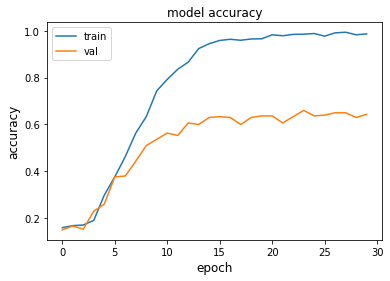

In [ ]:
def plotting_nn():
  metric = "accuracy"
  plt.figure()
  plt.plot(history.history[metric])
  plt.plot(history.history["val_" + metric])
  plt.title("model " + metric)
  plt.ylabel(metric, fontsize="large")
  plt.xlabel("epoch", fontsize="large")
  plt.legend(["train", "val"], loc="best")
  return plt.show()

plotting_nn()

Transformer


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import pipeline
import pandas as pd
# https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
classifier = pipeline("text-classification", 
                      model='bhadresh-savani/distilbert-base-uncased-emotion', 
                      tokenizer='distilbert-base-uncased')
# -----------------------------------------------------------------#
def transformer(df):

    # Applying it to the Text Column
    emotions = df['text'].apply(classifier)
# -----------------------------------------------------------------#
    # Extract the predicted emotion labels and scores
    predicted_emotions = emotions.apply(lambda x: x[0]['label'])
    predicted_scores = emotions.apply(lambda x: x[0]['score'])
# -----------------------------------------------------------------#
    # Combine the predicted emotion labels and scores into a dataframe
    df_predicted = pd.DataFrame({'text': df['text'],
                                 'predicted_emotion': predicted_emotions,
                                 'predicted_score': predicted_scores})
    return df_predicted
# -----------------------------------------------------------------#
# The Datasets
labelinfo = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}
train_df = pd.read_csv('/content/drive/MyDrive/Intro2AdvancedML/TwitterSentimentProject/TwitterSentiment.csv')
#-----------------------------------------------------------------------------#
#Undersample
train_df = undersampsRand(train_df)
#-----------------------------------------------------------------------------#
for i, num in enumerate(train_df['label']):
  for j in labelinfo:
    if labelinfo[j] == num:
      train_df['label'].loc[train_df.index[i]] = j

test_df = pd.read_csv('/content/drive/MyDrive/Intro2AdvancedML/TwitterSentimentProject/Kaggle1Sentiment.csv')
# -----------------------------------------------------------------#
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#------------------------------------------------------------------#

<ipython-input-92-9a7ee2933473>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['label'].loc[train_df.index[i]] = j


In [ ]:
# Transform the datasets
# -----------------------------------------------------------------#
temp =  X_train.apply(classifier)
train_pred = temp.apply(lambda x: x[0]['label'])

temp = X_val.apply(classifier)
val_pred = temp.apply(lambda x: x[0]['label'])

temp = X_test.apply(classifier)
test_pred = temp.apply(lambda x: x[0]['label'])

train_df_transformed = transformer(train_df)
kaggle_df_transformed = transformer(test_df)
# -----------------------------------------------------------------#
# Metrics
def MetricReport(truth, pred):
  print("Training Classification Report: ")

  print(classification_report(truth,
                              pred,
                              zero_division=1))

  print("\nTraining Confusion Matrix: ")
  cf_matrix = confusion_matrix(truth, pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
  cm_display.plot() 
  plt.show()

  print('Accuracy = ', accuracy_score(truth, pred))
  print('Precision = ', precision_score(truth, pred, average='macro'))
  print('Recall = ', recall_score(truth, pred, average='macro'))
  print('F1 Score = ', f1_score(truth, pred, average='macro'))

Training
Training Classification Report: 
              precision    recall  f1-score   support

       anger       0.98      0.98      0.98       399
        fear       0.90      0.98      0.94       409
         joy       0.99      0.99      0.99       401
        love       1.00      0.99      0.99       404
     sadness       0.99      0.99      0.99       382
    surprise       0.99      0.90      0.94       405

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400


Training Confusion Matrix: 


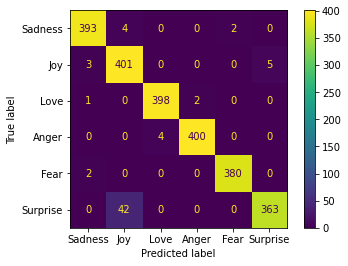

Accuracy =  0.9729166666666667
Precision =  0.9747176994766346
Recall =  0.9731801518599149
F1 Score =  0.9732798571819838

Validation
Training Classification Report: 
              precision    recall  f1-score   support

       anger       1.00      0.98      0.99        54
        fear       0.89      0.95      0.92        41
         joy       1.00      1.00      1.00        48
        love       1.00      1.00      1.00        45
     sadness       0.99      1.00      0.99        66
    surprise       0.95      0.89      0.92        46

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Training Confusion Matrix: 


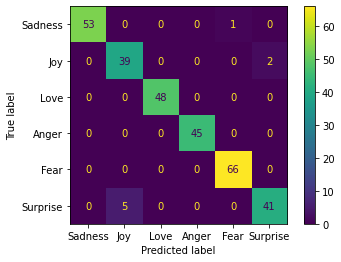

Accuracy =  0.9733333333333334
Precision =  0.9708211058870552
Recall =  0.9706675569171149
F1 Score =  0.9703551303408777

Test
Training Classification Report: 
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        47
        fear       0.96      1.00      0.98        50
         joy       0.98      0.98      0.98        51
        love       0.98      0.98      0.98        51
     sadness       1.00      1.00      1.00        52
    surprise       1.00      0.96      0.98        49

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Training Confusion Matrix: 


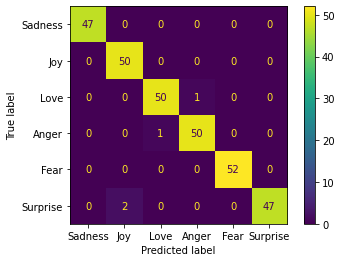

Accuracy =  0.9866666666666667
Precision =  0.9870537958773253
Recall =  0.9866613311991465
F1 Score =  0.9867238562091504


In [ ]:
print('Training')
MetricReport(y_train, train_pred)
print()
print('Validation')
MetricReport(y_val, val_pred)
print()
print('Test')
MetricReport(y_test, test_pred)

# Exercise 8

# Exercise 9

# Exercise 10

In [ ]:
# Blank space for trying things out.